### Valorile totale din 1990 - 2019

diferenta dintre ultimul an si primul an in mii de hectare: 221.19999999999982


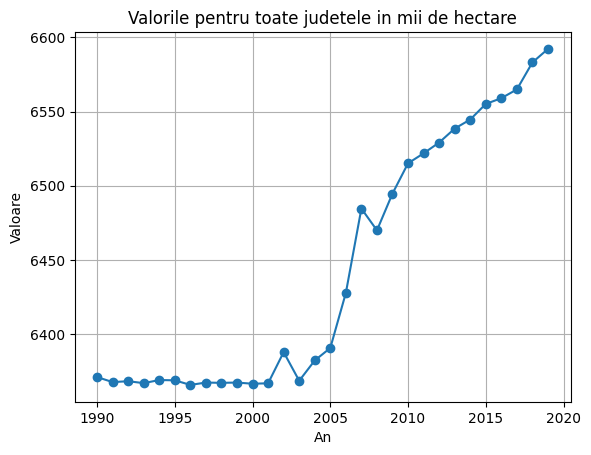

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
modified_dataset = pd.read_csv('modified_dataset.csv')

# Filter the data for Category = 'Total' and Region = 'TOTAL'
filtered_data = modified_dataset[(modified_dataset['Category'] == 'Total') & (modified_dataset['Region'] == 'TOTAL')]

# Group the filtered data by Year and calculate the sum of values for each year
grouped_data = filtered_data.groupby('Year')['Value'].sum()

# Calculate the difference between the first and last year
first_year_value = grouped_data.iloc[0]
last_year_value = grouped_data.iloc[-1]
difference = last_year_value - first_year_value

print(f'diferenta dintre ultimul an si primul an in mii de hectare: {difference}')


# Plot the data
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-')
plt.xlabel('An')
plt.ylabel('Valoare')
plt.title('Valorile pentru toate judetele in mii de hectare')
plt.grid(True)
plt.show()



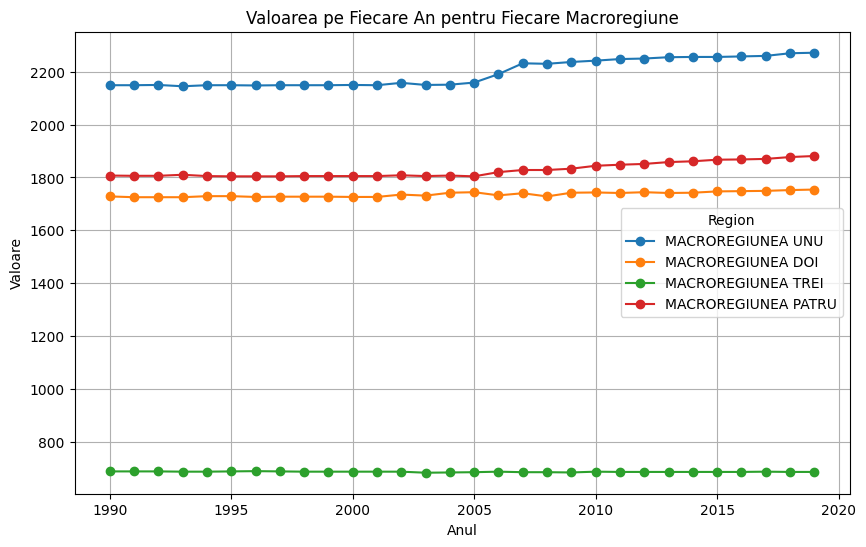

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
Macroregiuni = pd.read_csv('Macroregiuni.csv')

# Ensure 'Category' is 'Total'
filtered_data = Macroregiuni[Macroregiuni['Category'] == 'Total']

# List of regions
regions = ['MACROREGIUNEA UNU', 'MACROREGIUNEA DOI', 'MACROREGIUNEA TREI', 'MACROREGIUNEA PATRU']

# Plotting
plt.figure(figsize=(10, 6))

# Loop through each region and plot the data
for region in regions:
    region_data = filtered_data[filtered_data['Region'] == region]
    grouped_data = region_data.groupby('Year')['Value'].sum()
    plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', label=region)

# Adding labels and title
plt.xlabel('Anul')
plt.ylabel('Valoare')
plt.title('Valoarea pe Fiecare An pentru Fiecare Macroregiune')
plt.legend(title='Region')
plt.grid(True)
plt.show()


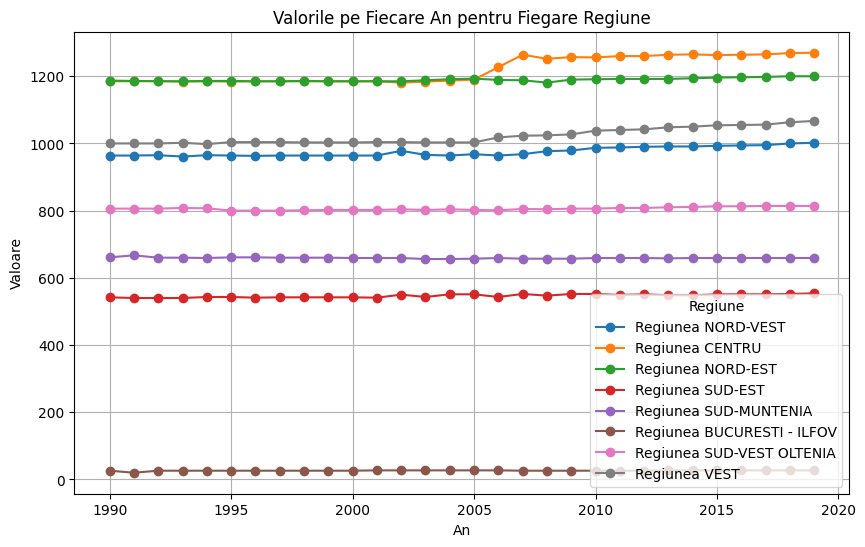

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
Judete = pd.read_csv('Regiuni.csv')

# List of unique regions in the dataset
regions = Judete['Region'].unique()

# Plotting
plt.figure(figsize=(10, 6))

# Loop through each region and plot the data
for region in regions:
    region_data = Judete[Judete['Region'] == region]
    grouped_data = region_data.groupby('Year')['Value'].sum()
    plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', label=region)

# Adding labels and title
plt.xlabel('An')
plt.ylabel('Valoare')
plt.title('Valorile pe Fiecare An pentru Fiegare Regiune')
plt.legend(title='Regiune')
plt.grid(True)
plt.show()


### Cea mai mare diferenta de valoare din toate judetele

In [18]:
import pandas as pd

# Load the dataset
Judete = pd.read_csv('Judete.csv')

# Ensure 'Category' is 'Total'
filtered_data = Judete[Judete['Category'] == 'Total']

# Group the data by 'Region' and calculate the difference between 2019 and 1990
grouped_data = filtered_data.groupby('Region').agg({'Value': lambda x: x.iloc[-1] - x.iloc[0]})

# Sort the regions based on the calculated differences
sorted_regions = grouped_data.sort_values(by='Value', ascending=False)

# Select the top 5 regions with the largest differences
top_5_regions = sorted_regions.head(5)

# Display the top 5 regions with the largest differences
print("Top 5 regions with the largest difference between 2019 and 1990:")
print(top_5_regions)


Top 5 regions with the largest difference between 2019 and 1990:
               Value
Region              
Caras-Severin     40
Harghita          33
Cluj              17
Sibiu             16
Bihor             16


### Arima algorithm top 5 cele mai bune regresii

C:\Users\User\AppData\Local\Temp\ipykernel_8620\31511702.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = forecast_values[-1] - historical_value_1990
C:\Users\User\AppData\Local\Temp\ipykernel_8620\31511702.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = forecast_values[-1] - historical_value_1990
C:\Users\User\AppData\Local\Temp\ipykernel_8620\31511702.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[

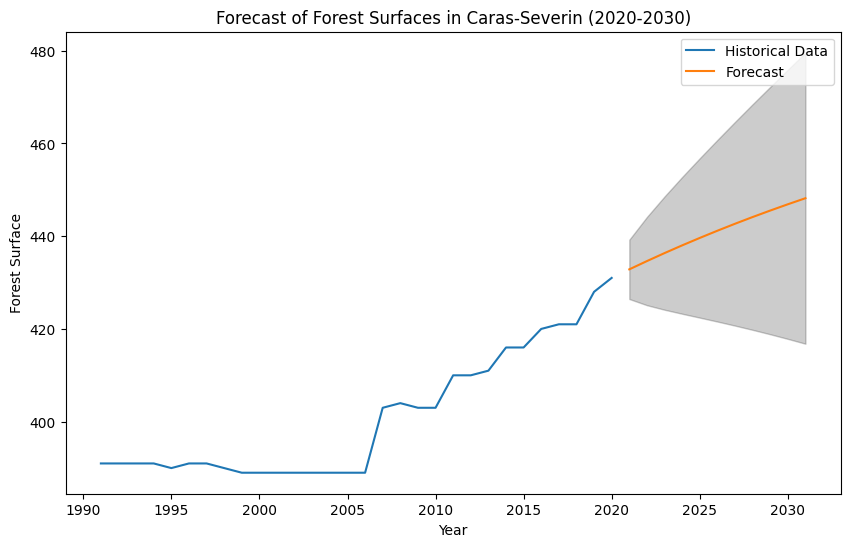

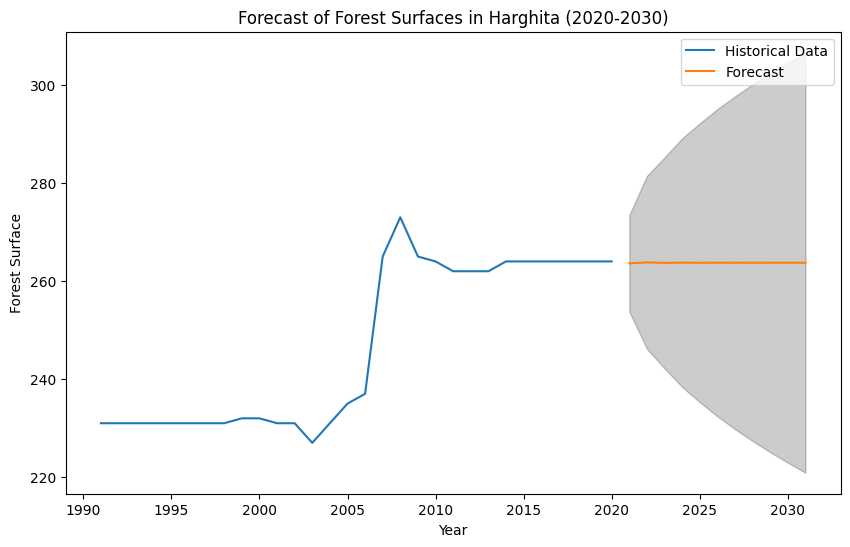

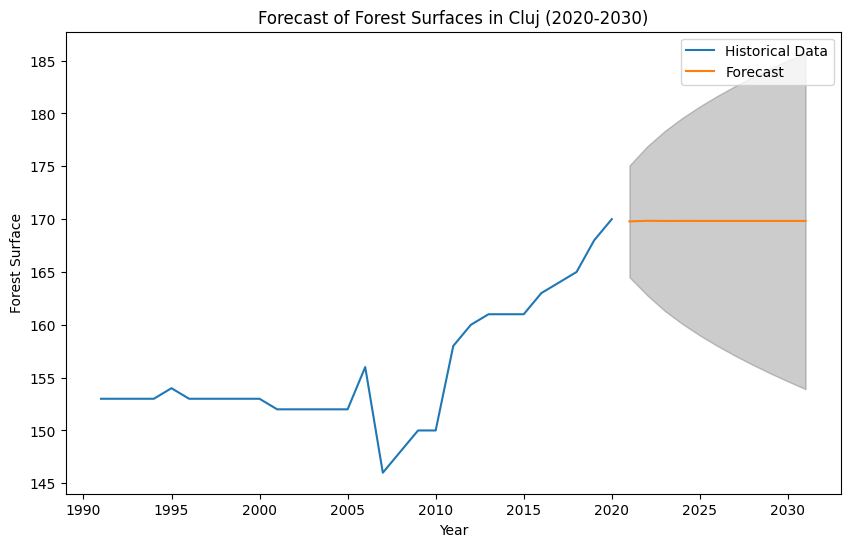

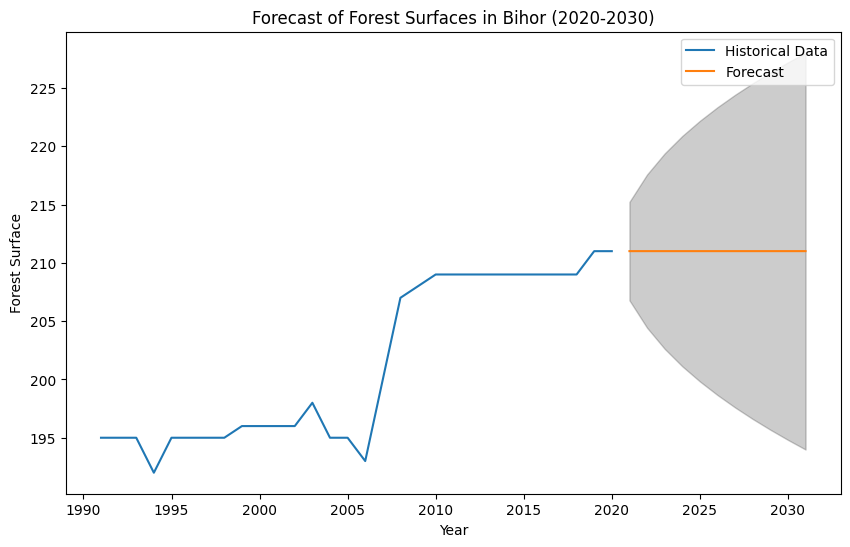

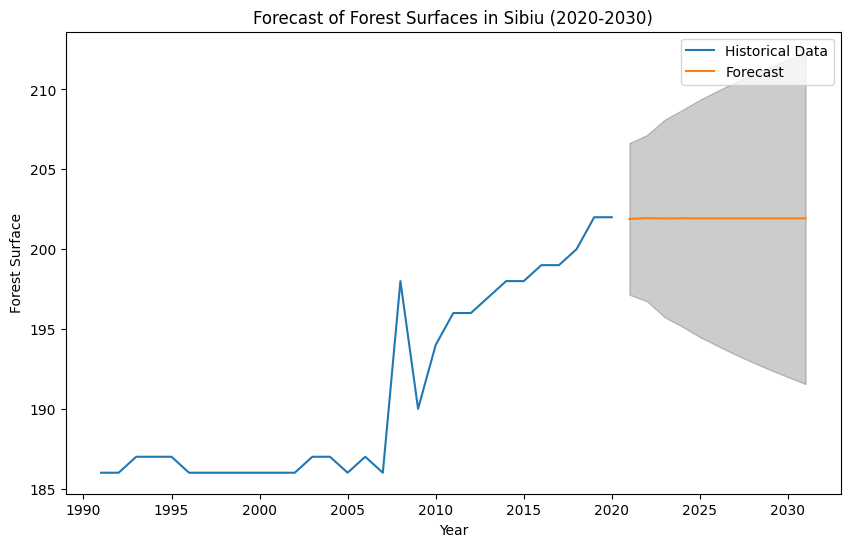

In [25]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
Judete = pd.read_csv('Judete.csv')

# Ensure 'Year' is a datetime object and set as index
Judete['Year'] = pd.to_datetime(Judete['Year'], format='%Y')

# Ensure 'Category' is 'Total'
filtered_data = Judete[Judete['Category'] == 'Total']

# List of unique regions in the dataset
regions = filtered_data['Region'].unique()

# Dictionary to store differences for each region
region_differences = {}

# Loop through each region and fit ARIMA model
for region in regions:
    region_data = filtered_data[filtered_data['Region'] == region]
    region_data.set_index('Year', inplace=True)
    region_data = region_data.resample('YE').sum()  # Ensuring yearly data

    # Fit ARIMA model
    model = ARIMA(region_data['Value'], order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast from 2020 to 2030
    forecast = model_fit.get_forecast(steps=11)
    forecast_index = pd.date_range(start='2020-12-31', end='2030-12-31', freq='YE')
    forecast_values = forecast.predicted_mean

    # Calculate the difference between the forecasted value for 2030 and the value for 1990
    try:
        historical_value_1990 = region_data.loc['1990-12-31']['Value']
    except KeyError:
        continue  # Skip regions without 1990 data

    difference = forecast_values[-1] - historical_value_1990
    region_differences[region] = difference

# Sort regions by the calculated differences and select top 5
top_5_regions = sorted(region_differences, key=region_differences.get, reverse=True)[:5]

# Plot the results for the top 5 regions
for region in top_5_regions:
    region_data = filtered_data[filtered_data['Region'] == region]
    region_data.set_index('Year', inplace=True)
    region_data = region_data.resample('YE').sum()  # Ensuring yearly data

    # Fit ARIMA model again for plotting
    model = ARIMA(region_data['Value'], order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.get_forecast(steps=11)
    forecast_index = pd.date_range(start='2020-12-31', end='2030-12-31', freq='YE')
    forecast_values = forecast.predicted_mean
    forecast_conf = forecast.conf_int()

    plt.figure(figsize=(10, 6))
    plt.plot(region_data.index, region_data['Value'], label='Historical Data')
    plt.plot(forecast_index, forecast_values, label='Forecast')
    plt.fill_between(forecast_index, forecast_conf.iloc[:, 0], forecast_conf.iloc[:, 1], color='k', alpha=0.2)
    plt.xlabel('Year')
    plt.ylabel('Forest Surface')
    plt.title(f'Forecast of Forest Surfaces in {region} (2020-2030)')
    plt.legend()
    plt.show()


### ARIMA algorithm pentru toate regiuniile

D:\machine_learning\Forest-Surfaces-in-Romania-1990-2019\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\machine_learning\Forest-Surfaces-in-Romania-1990-2019\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Temp\ipykernel_8620\2856094093.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = forecast_values[-1] - historical_value_1990


Difference between 2030 and 1990: 281.2503067490543


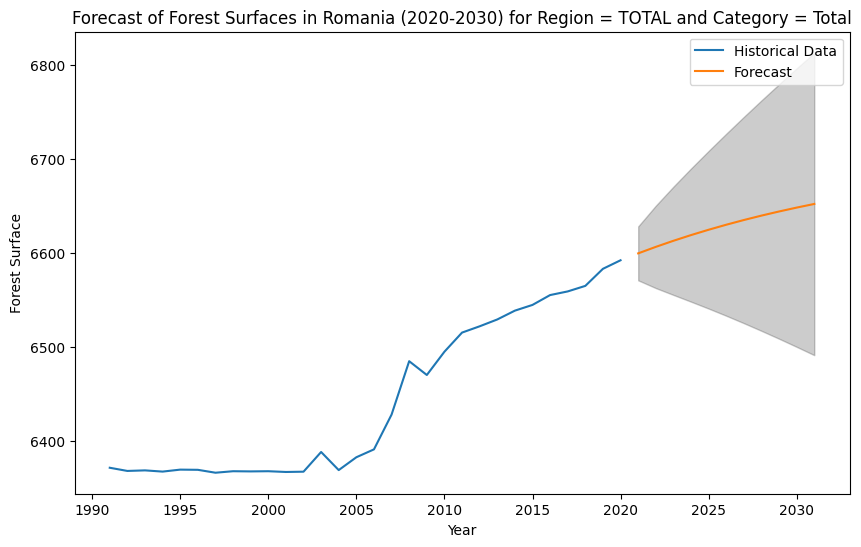

In [30]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
Judete = pd.read_csv('modified_dataset.csv')

# Ensure 'Year' is a datetime object and set as index
Judete['Year'] = pd.to_datetime(Judete['Year'], format='%Y')

# Filter the data for 'TOTAL' region and 'Total' category
filtered_data = Judete[(Judete['Region'] == 'TOTAL') & (Judete['Category'] == 'Total')]

# Set 'Year' as the index
filtered_data.set_index('Year', inplace=True)

# Resample the data to ensure yearly data
filtered_data = filtered_data.resample('YE').sum()

# Fit ARIMA model
model = ARIMA(filtered_data['Value'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast from 2020 to 2030
forecast = model_fit.get_forecast(steps=11)
forecast_index = pd.date_range(start='2020-12-31', end='2030-12-31', freq='YE')
forecast_values = forecast.predicted_mean
forecast_conf = forecast.conf_int()

# Calculate the difference between the forecasted value for 2030 and the historical value for 1990
try:
    historical_value_1990 = filtered_data.loc['1990-12-31']['Value']
    difference = forecast_values[-1] - historical_value_1990
    print(f"Difference between 2030 and 1990: {difference}")
except KeyError:
    print("Data for 1990 is not available.")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['Value'], label='Historical Data')
plt.plot(forecast_index, forecast_values, label='Forecast')
plt.fill_between(forecast_index, forecast_conf.iloc[:, 0], forecast_conf.iloc[:, 1], color='k', alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Forest Surface')
plt.title('Forecast of Forest Surfaces in Romania (2020-2030) for Region = TOTAL and Category = Total')
plt.legend()
plt.show()


Data for 1990 is not available.


C:\Users\User\AppData\Local\Temp\ipykernel_8620\1121031473.py:28: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


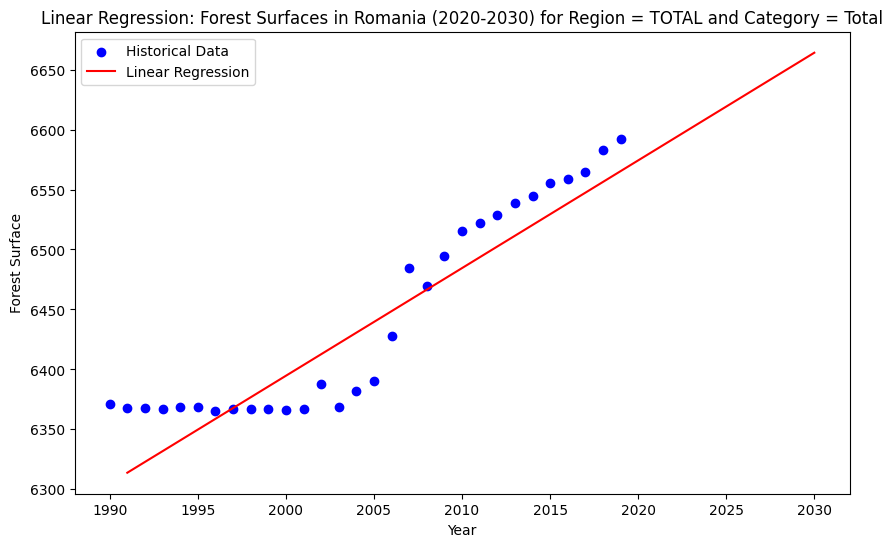

In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
Judete = pd.read_csv('modified_dataset.csv')

# Ensure 'Year' is a datetime object
Judete['Year'] = pd.to_datetime(Judete['Year'], format='%Y')

# Filter the data for 'TOTAL' region and 'Total' category
filtered_data = Judete[(Judete['Region'] == 'TOTAL') & (Judete['Category'] == 'Total')]

# Aggregate data by year
filtered_data = filtered_data.groupby('Year')['Value'].sum().reset_index()

# Extracting year values as integers
X = filtered_data['Year'].dt.year.values.reshape(-1, 1)

# Extracting forest surface values
y = filtered_data['Value']

# Initialize and fit Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict forest surface for years from 1990 to 2030
years = pd.Series(pd.date_range(start='1990', end='2030', freq='YE'))
X_pred = years.dt.year.values.reshape(-1, 1)
y_pred = model.predict(X_pred)

# Calculate the difference between the forecasted value for 2030 and the historical value for 1990
try:
    historical_value_1990 = filtered_data.loc[filtered_data['Year'].dt.year == 1990, 'Value'].iloc[0]
    difference = y_pred[-1] - historical_value_1990
    print(f"Difference between 2030 and 1990: {difference}")
except IndexError:
    print("Data for 1990 is not available.")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Year'], filtered_data['Value'], color='blue', label='Historical Data')
plt.plot(years, y_pred, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Forest Surface')
plt.title('Linear Regression: Forest Surfaces in Romania (1990-2030) for Region = TOTAL and Category = Total')
plt.legend()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


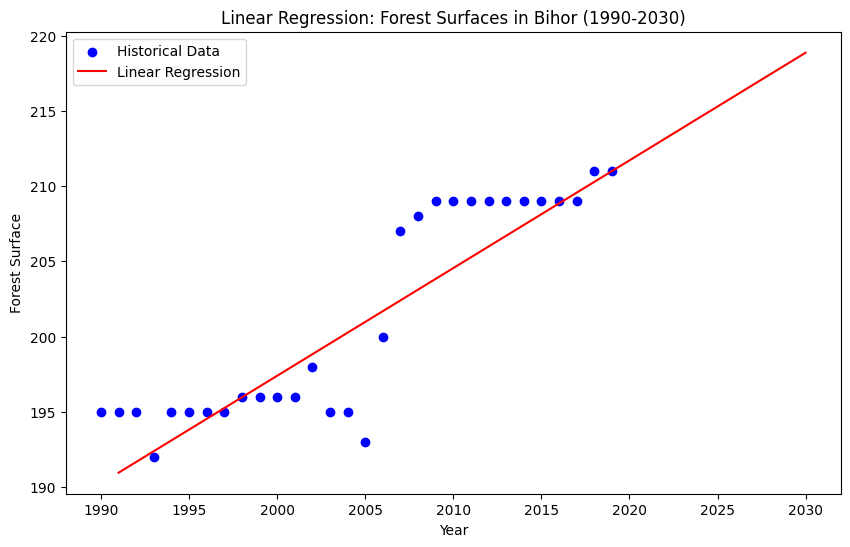

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


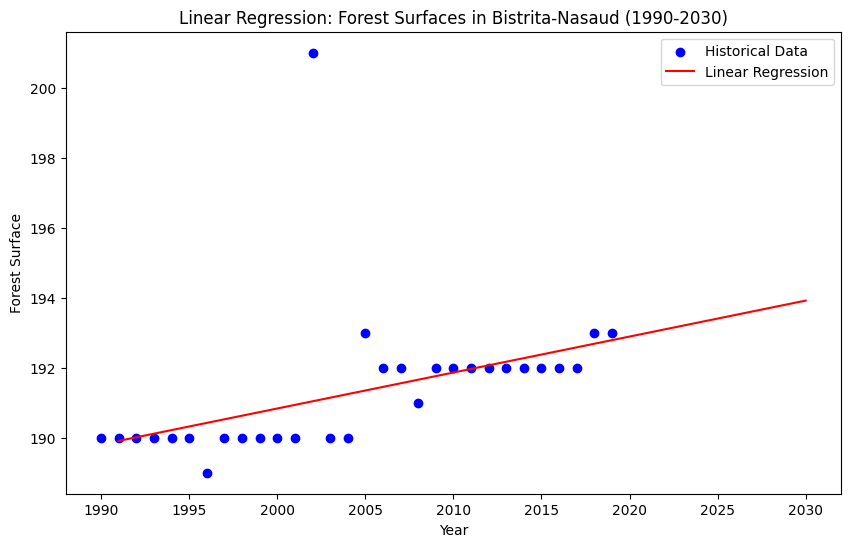

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


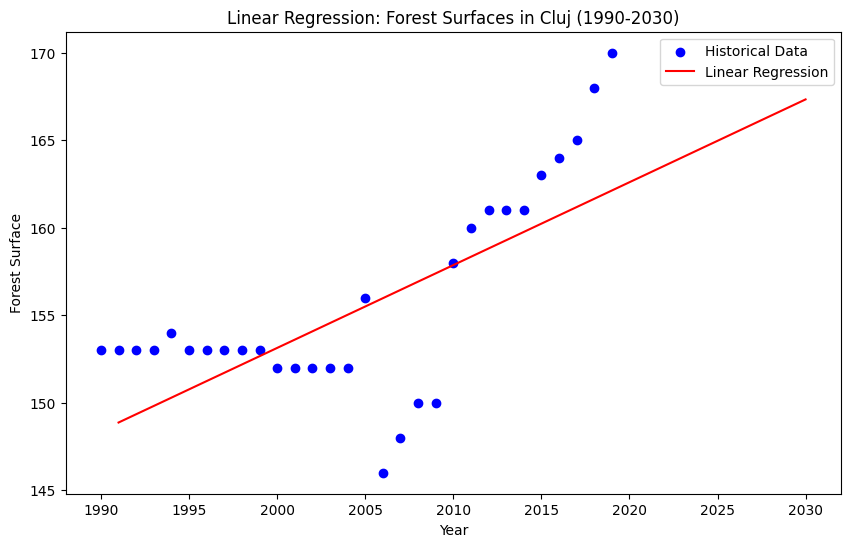

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


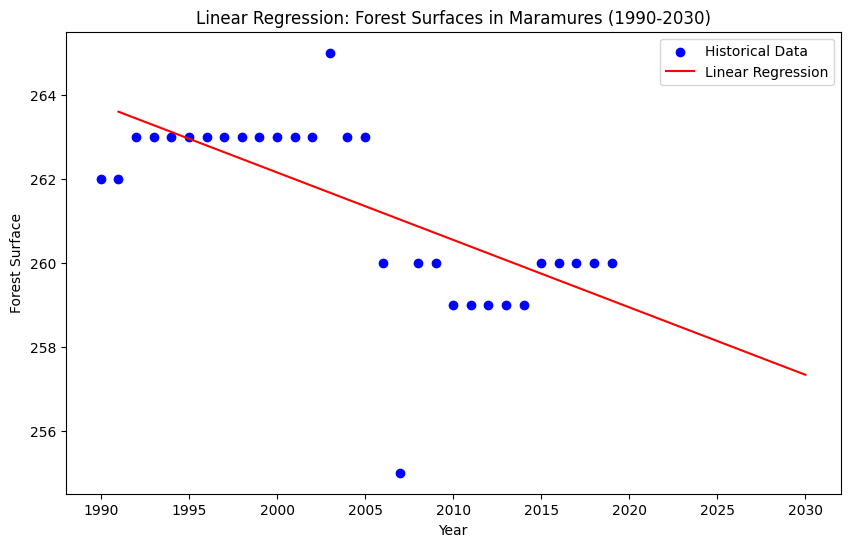

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


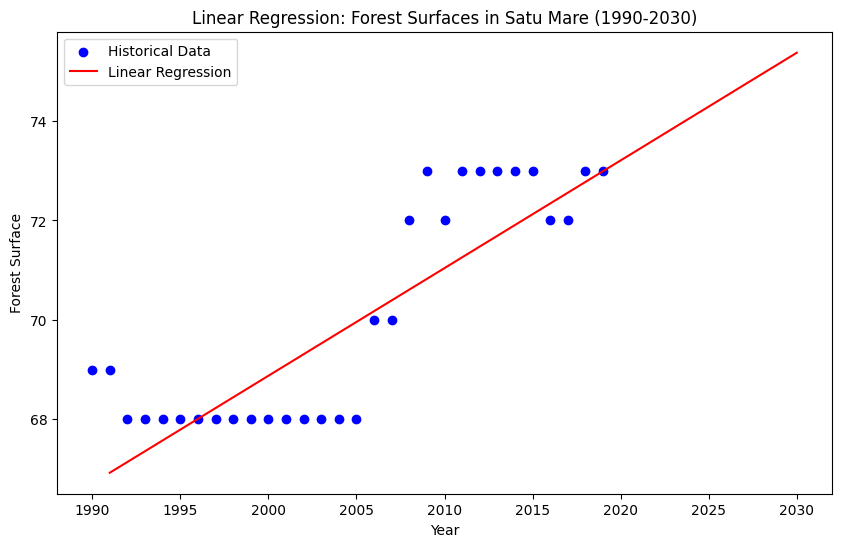

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


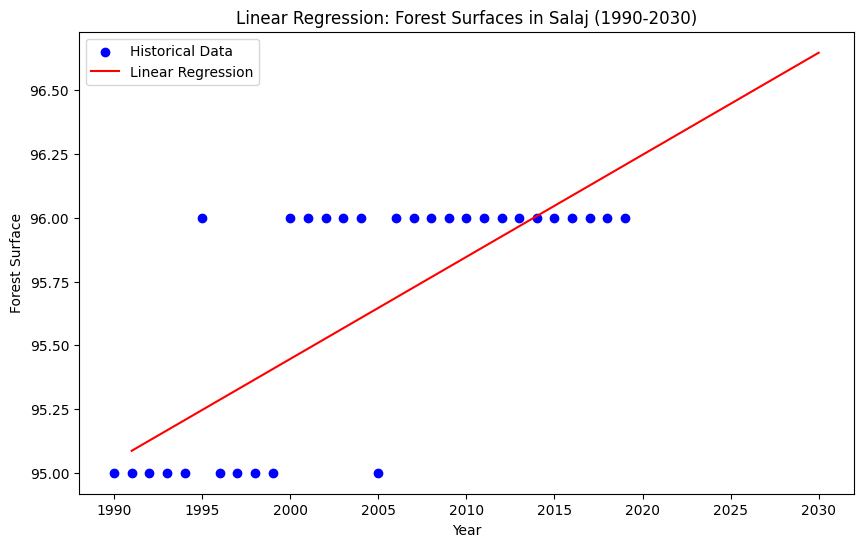

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


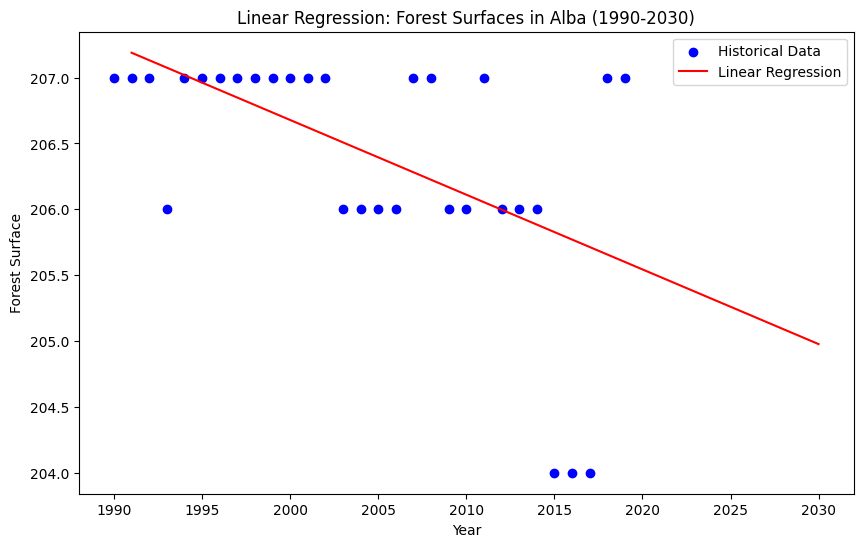

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


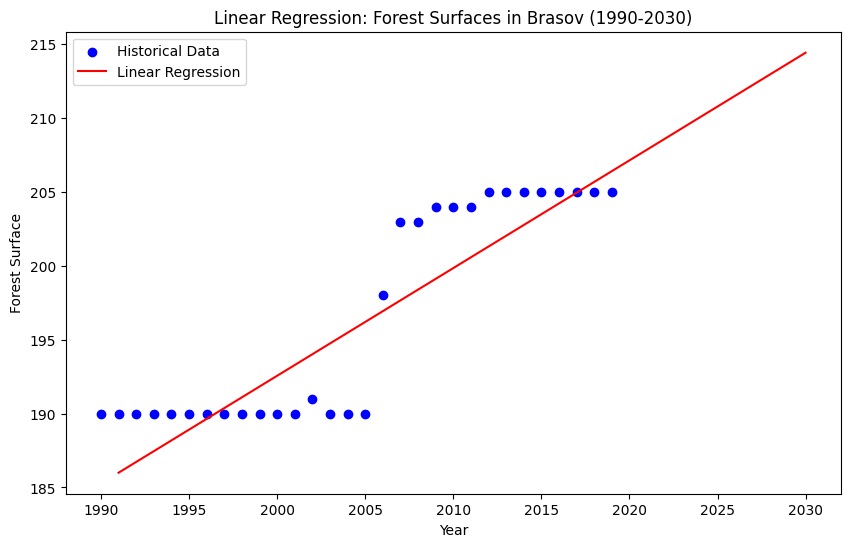

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


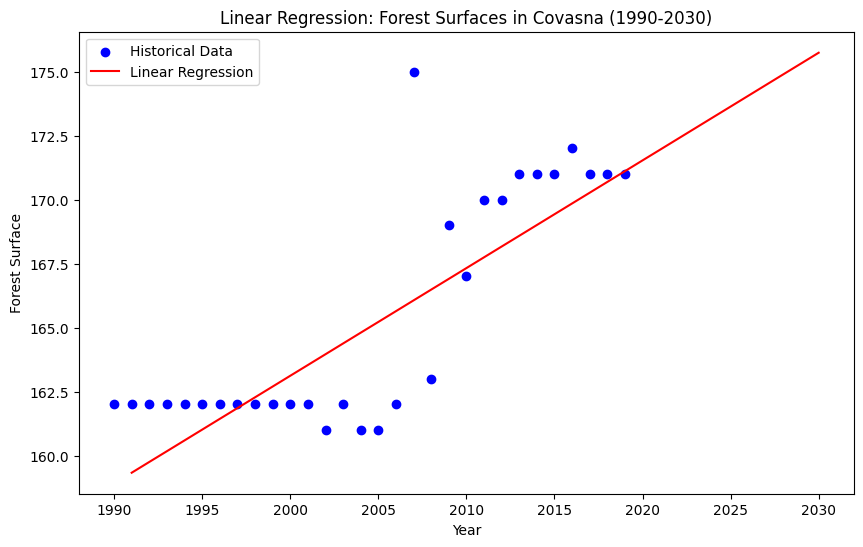

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


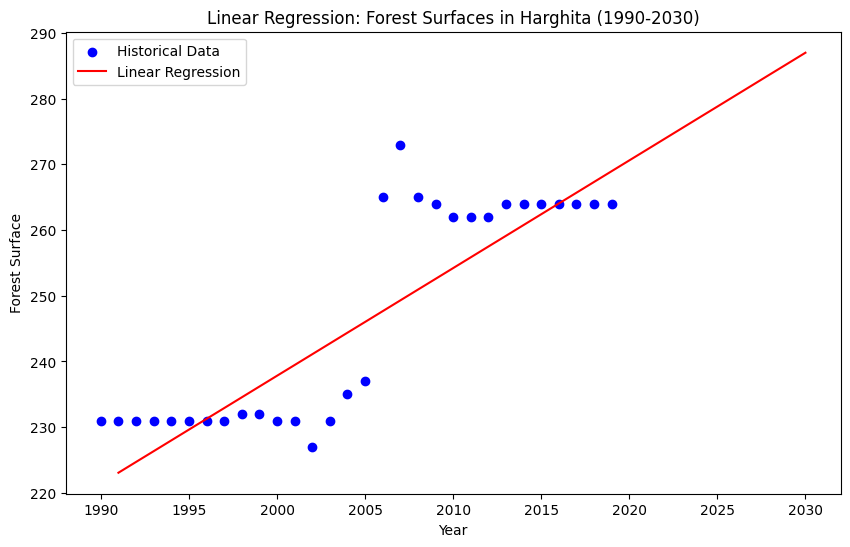

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


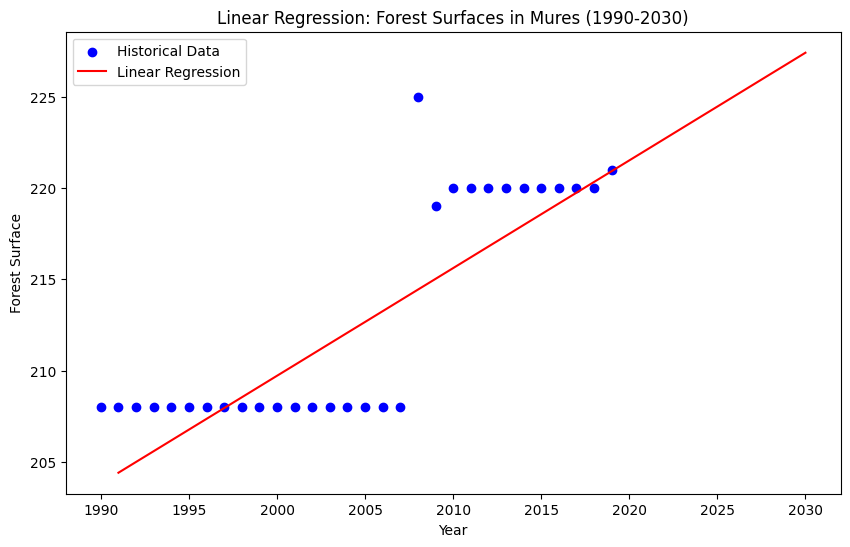

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


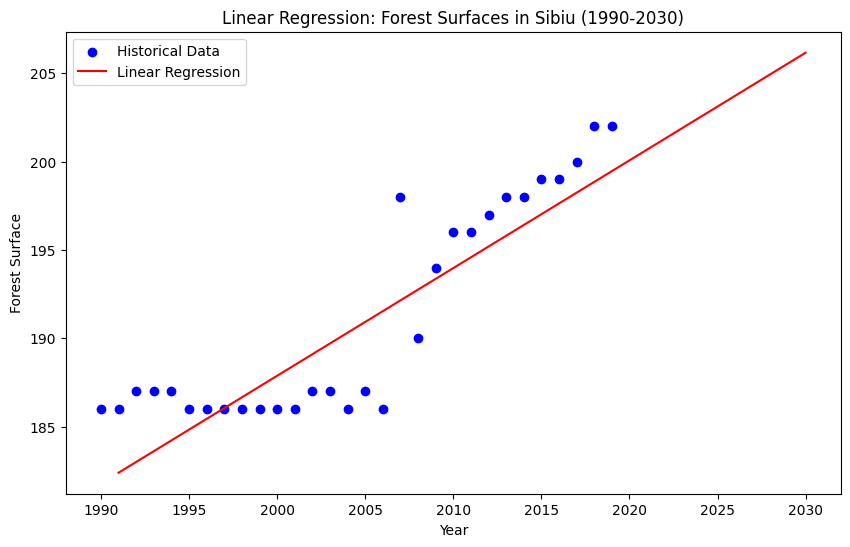

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


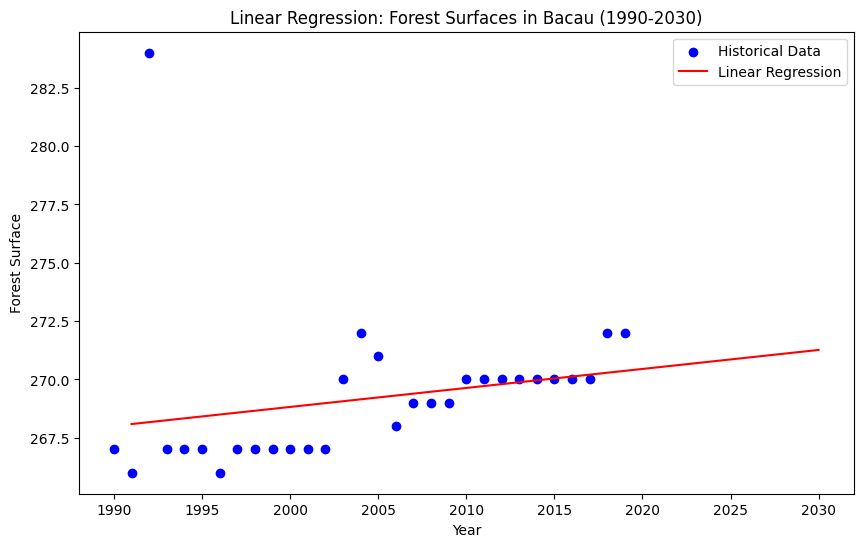

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


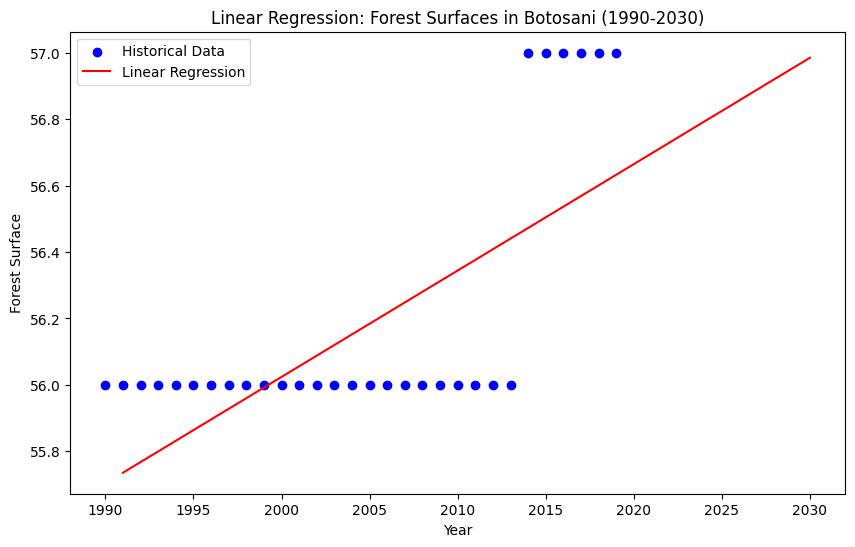

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


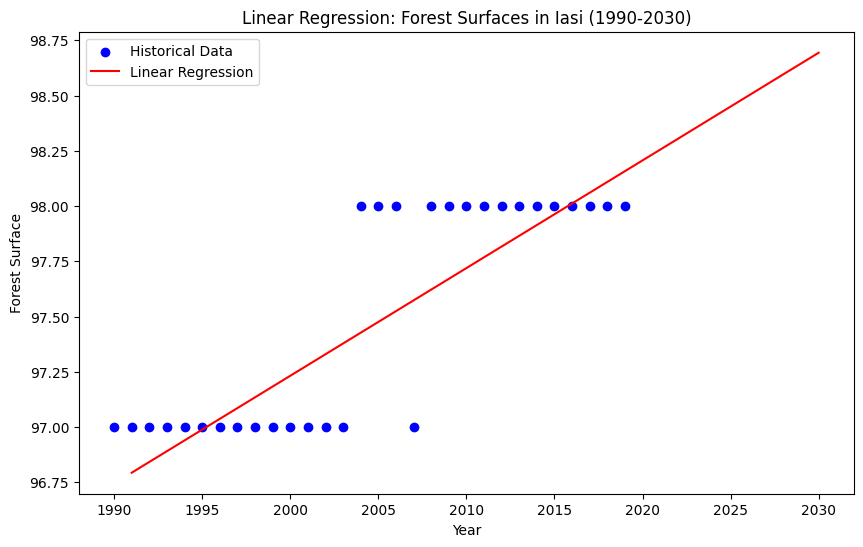

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


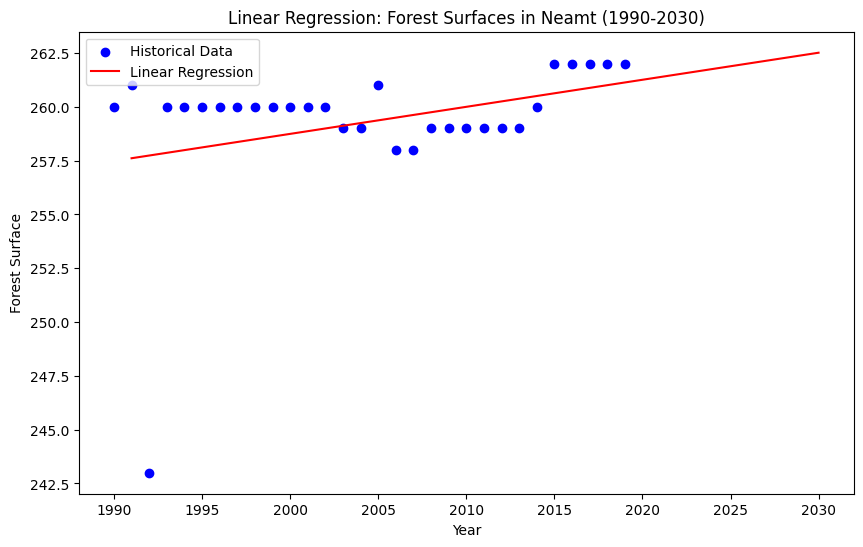

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


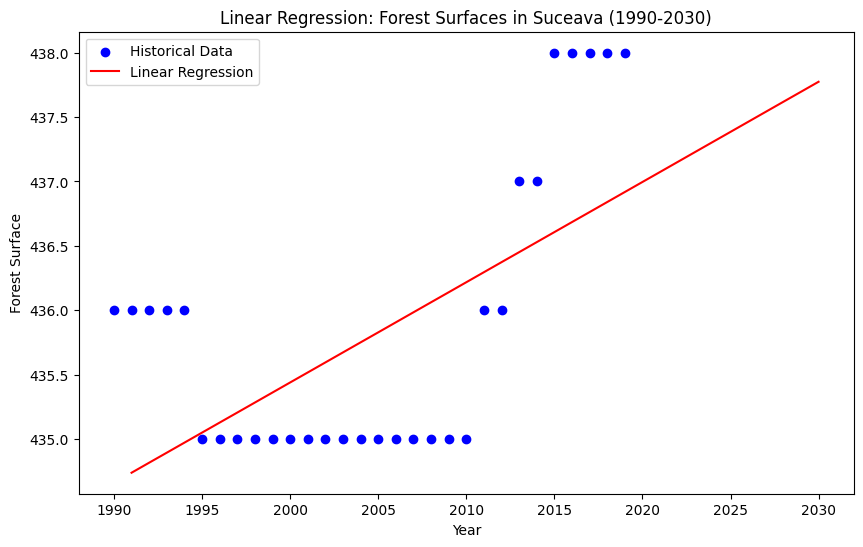

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


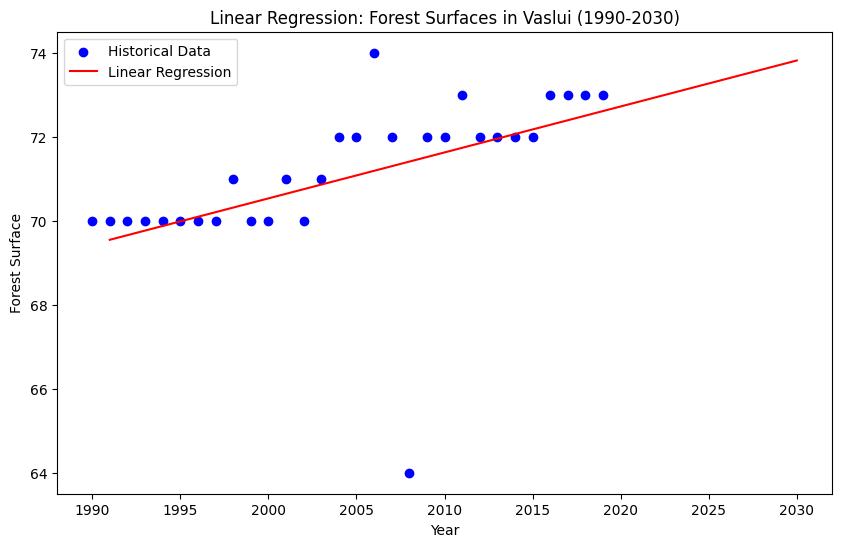

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


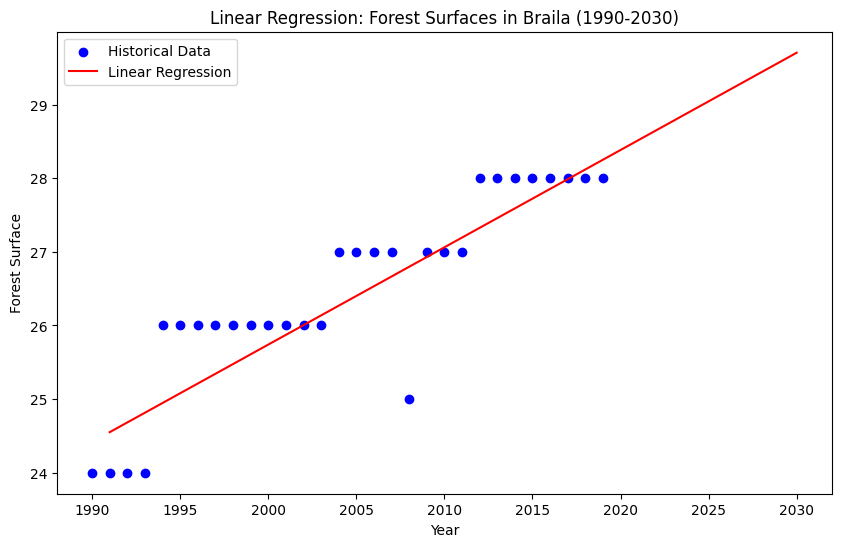

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


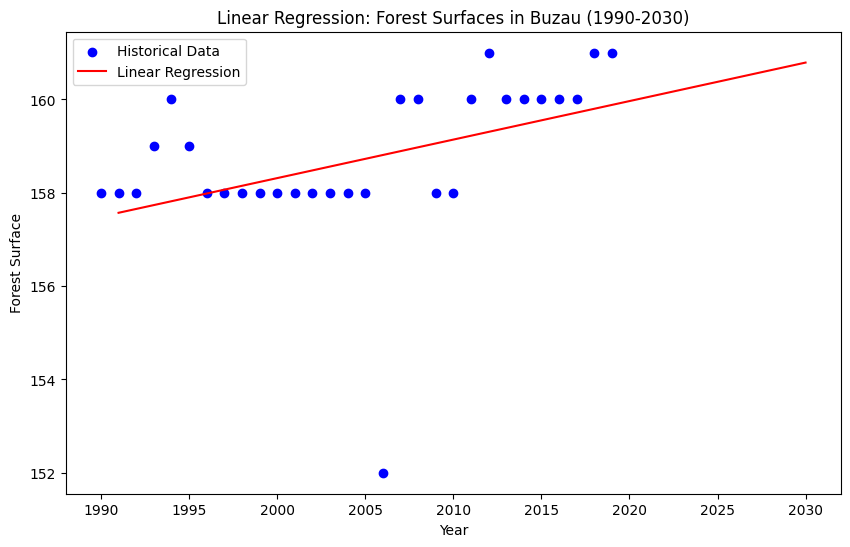

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


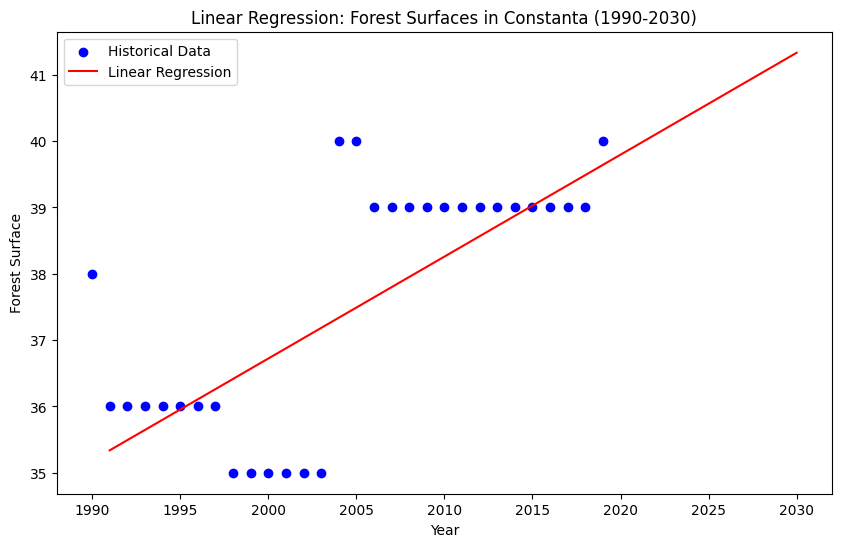

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


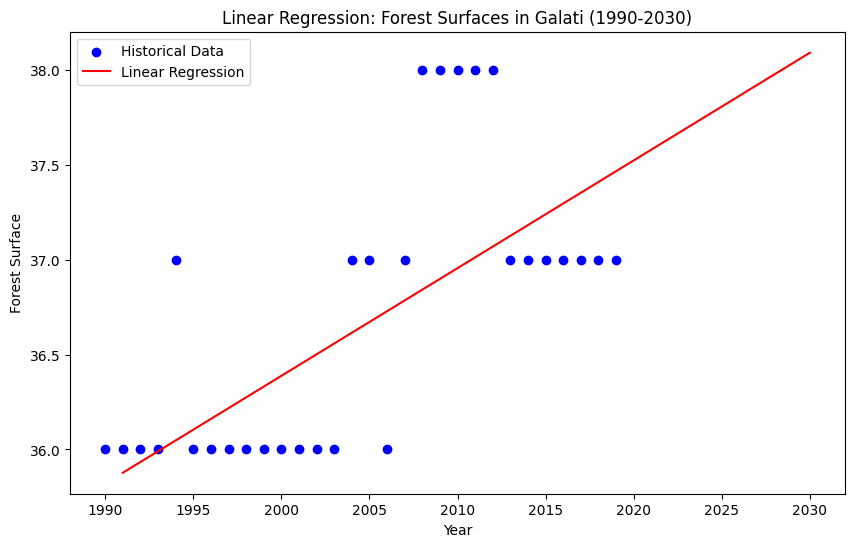

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


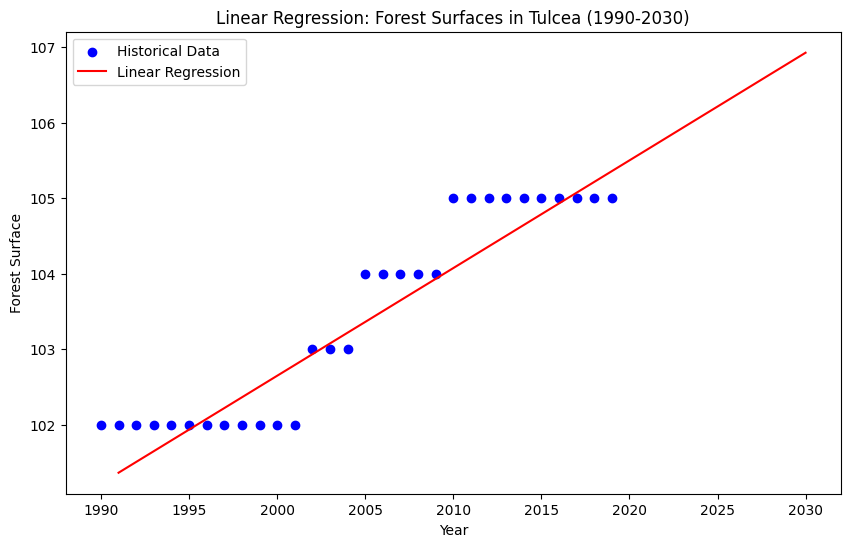

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


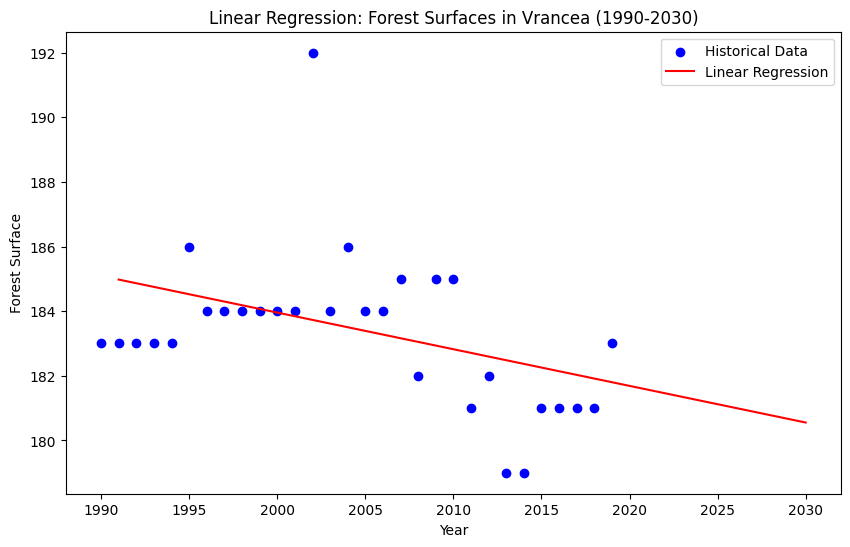

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


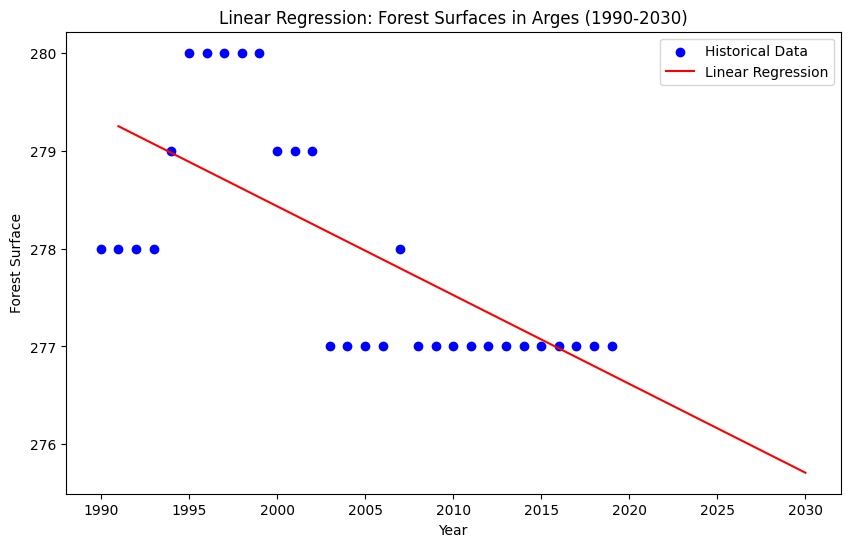

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


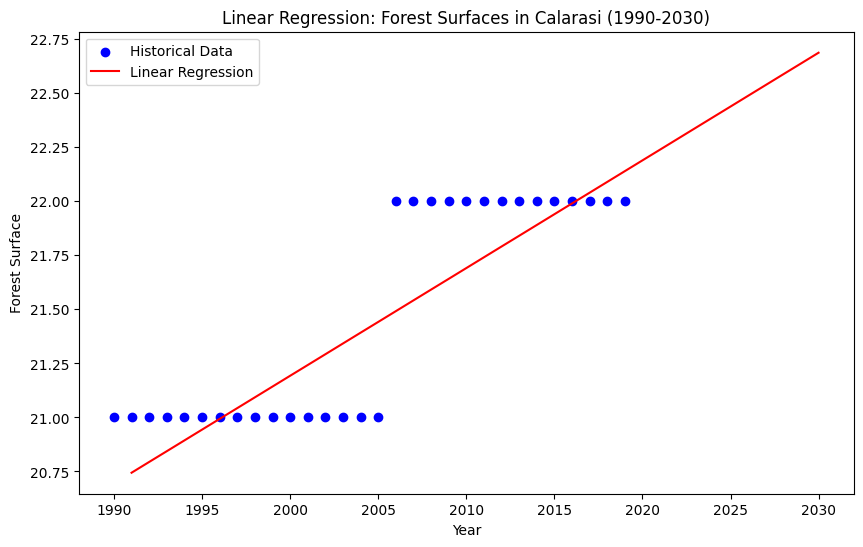

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


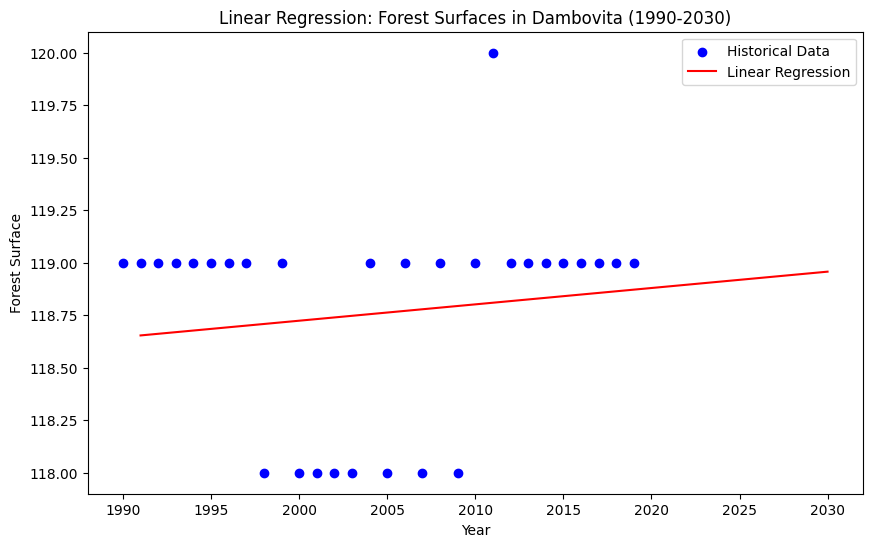

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


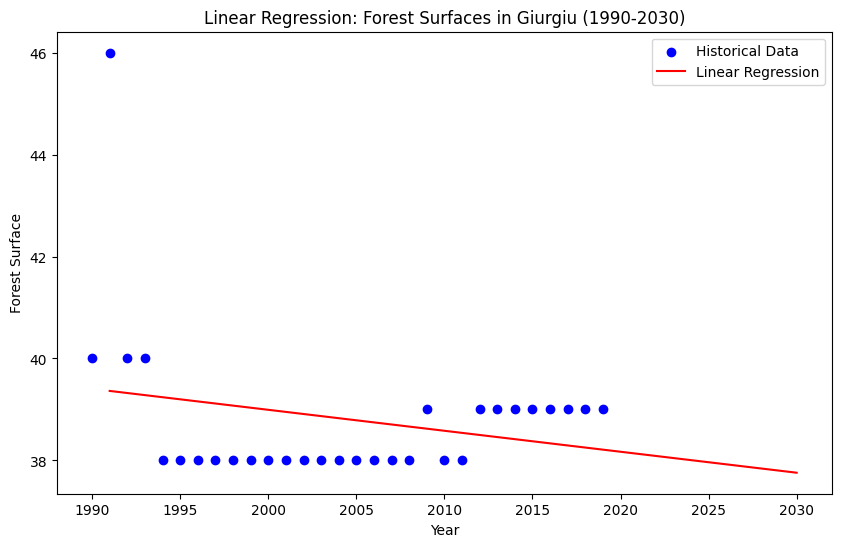

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


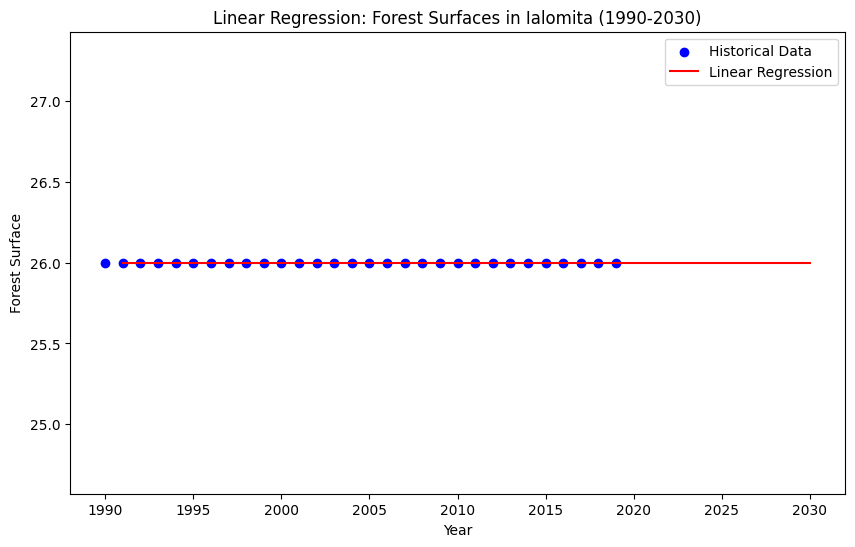

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


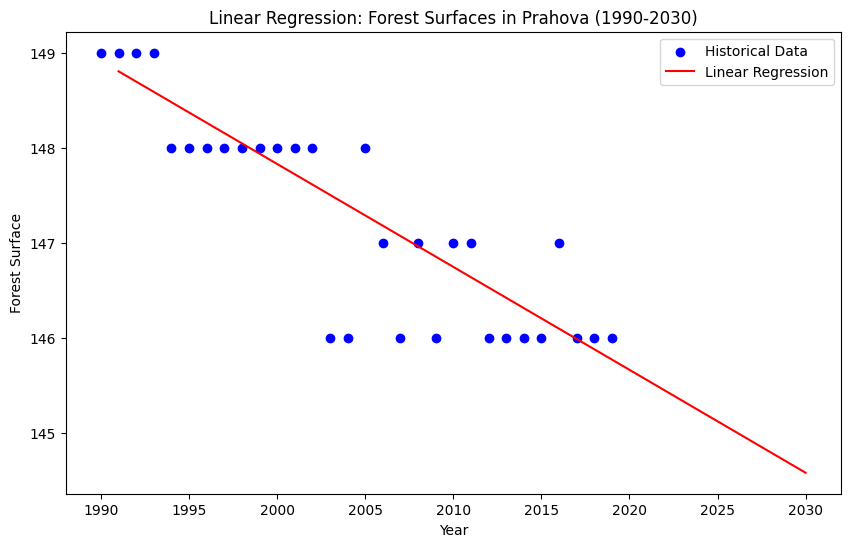

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


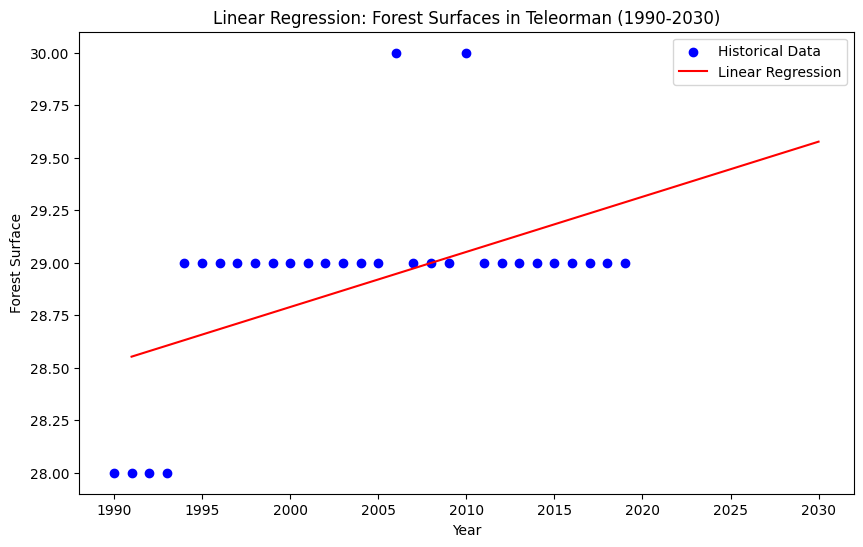

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


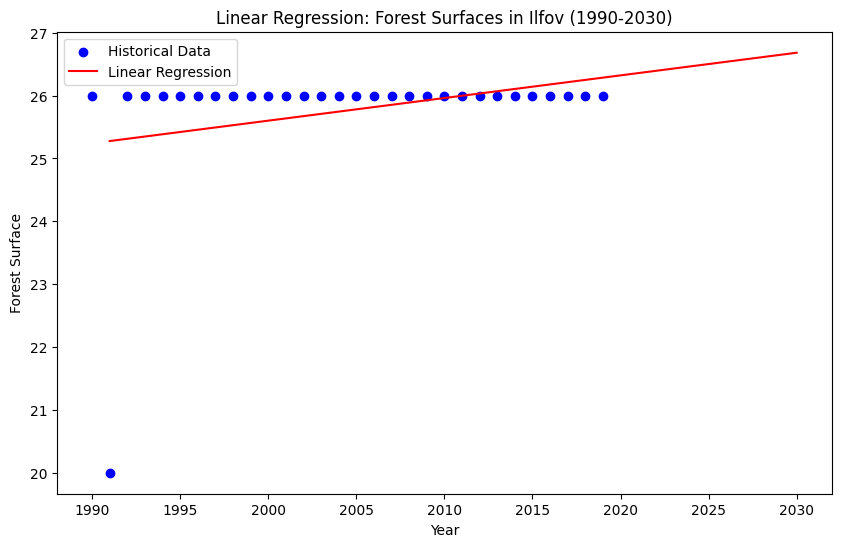

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


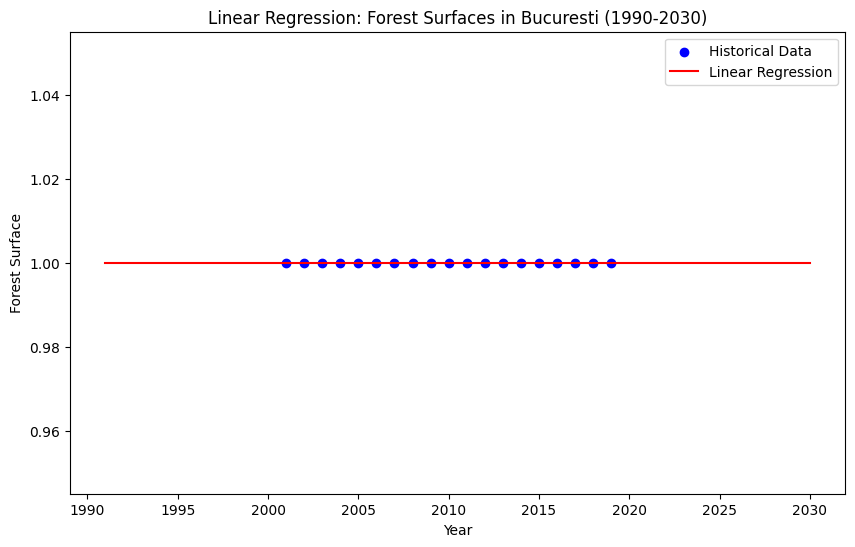

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


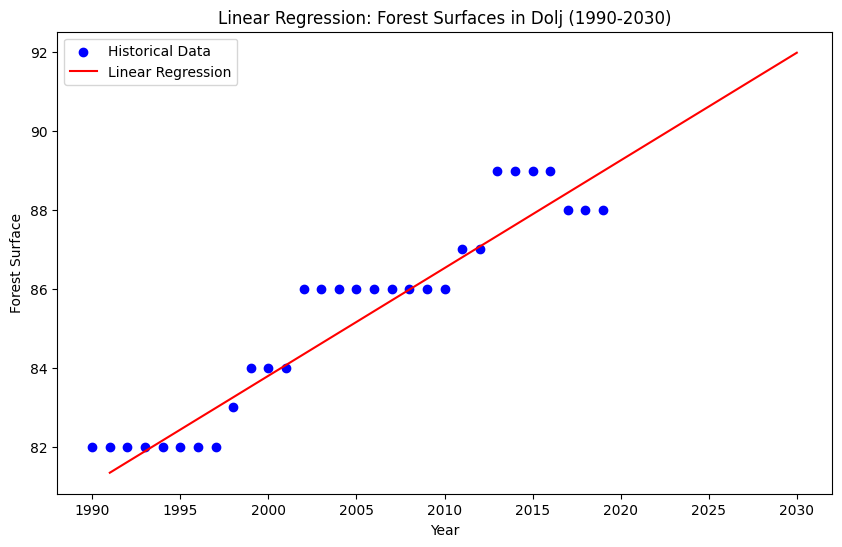

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


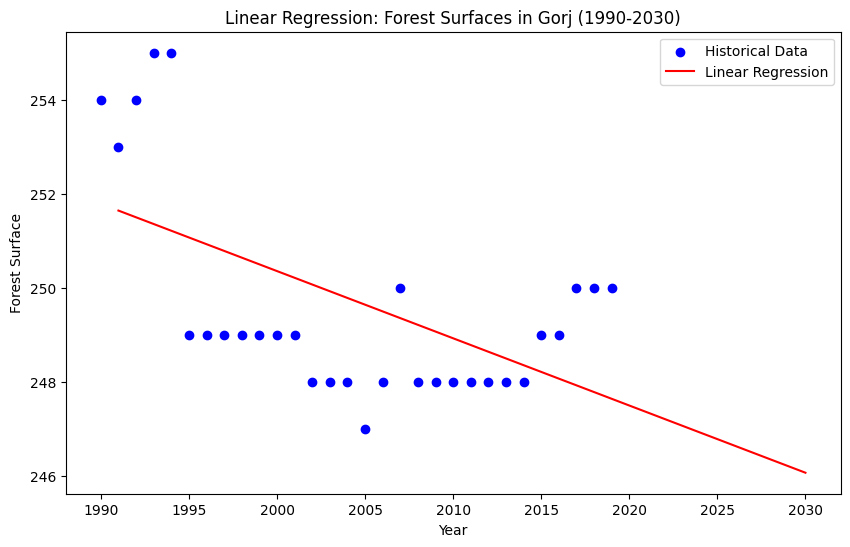

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


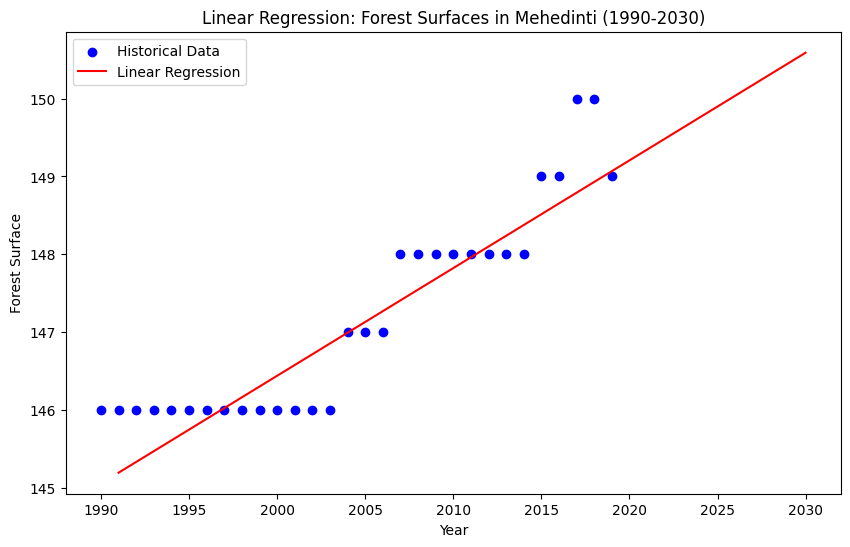

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


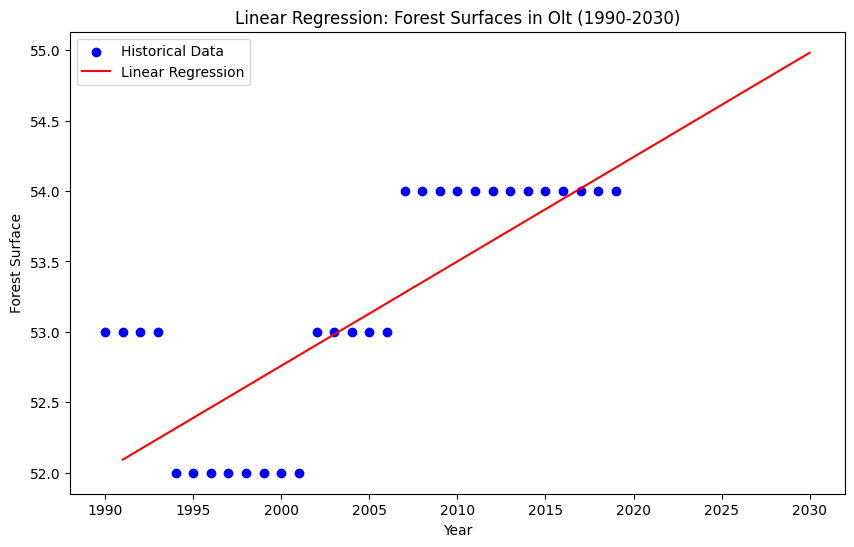

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


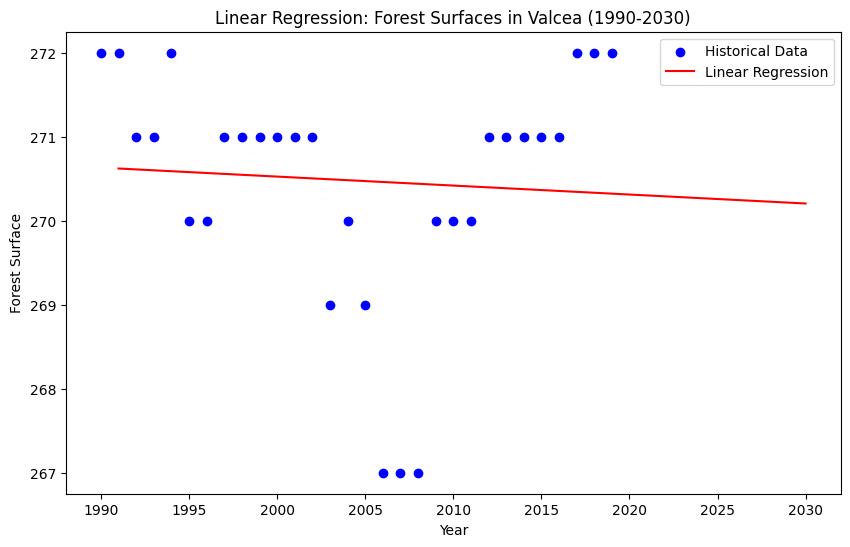

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


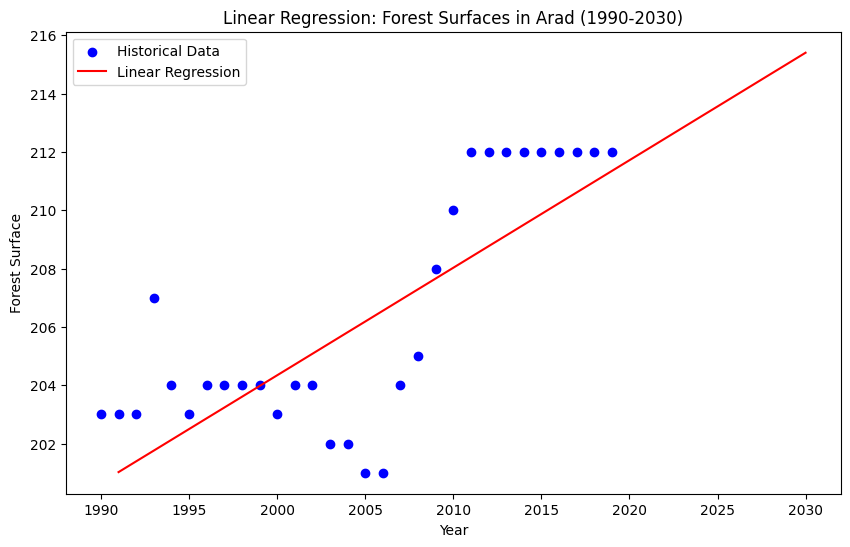

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


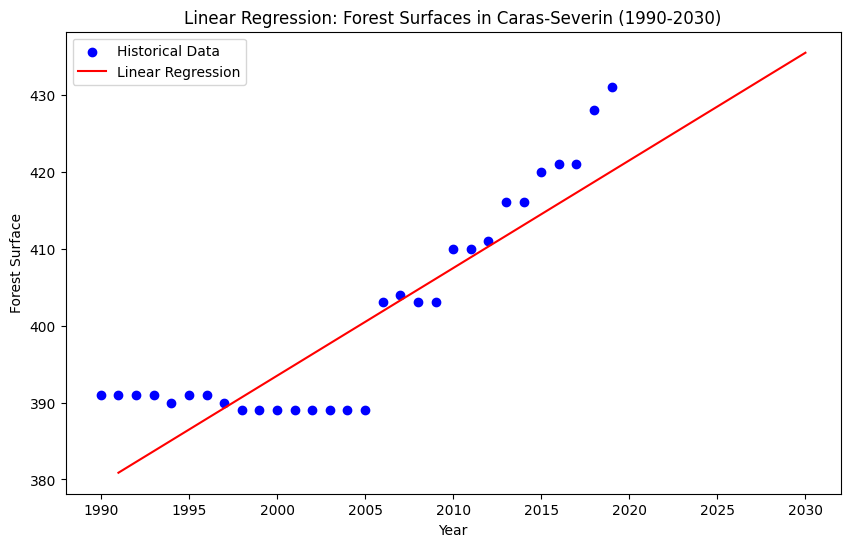

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


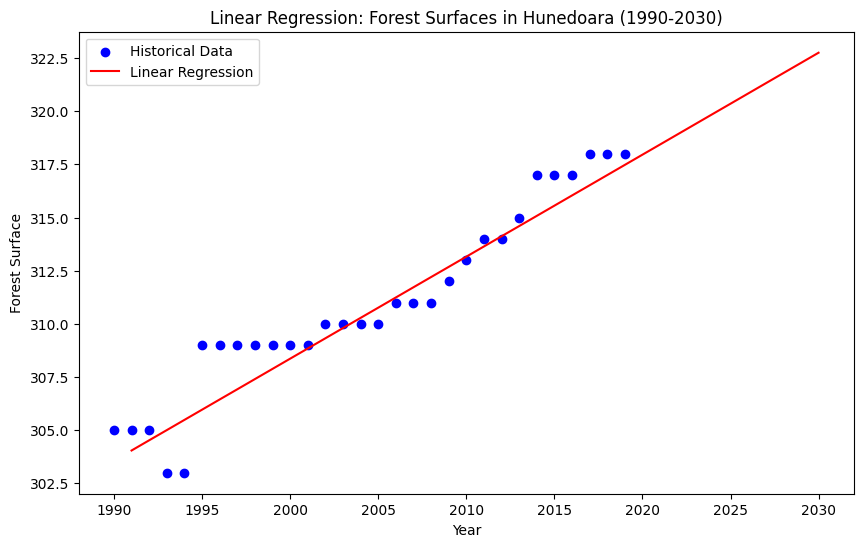

C:\Users\User\AppData\Local\Temp\ipykernel_8620\85591870.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.Series(pd.date_range(start='1990', end='2030', freq='Y'))


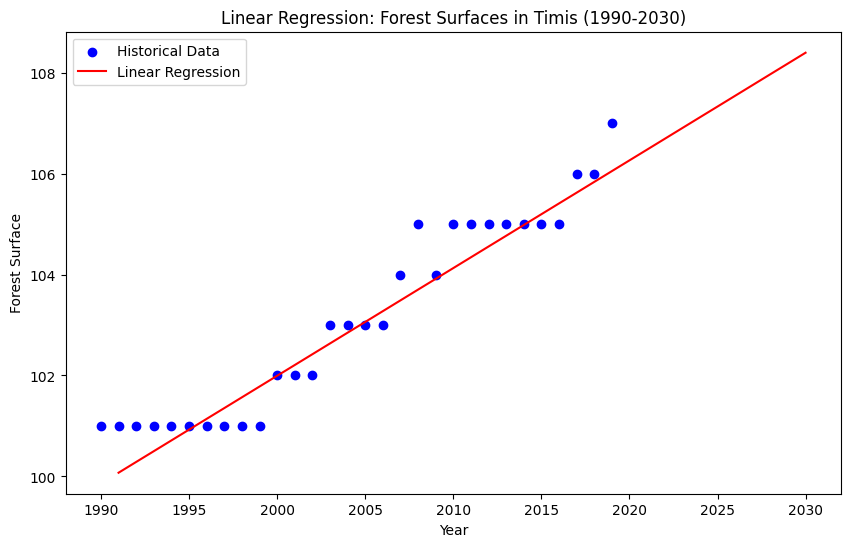

Top 5 regions with the largest difference between 1990 and 2030:
Harghita: 55.98717093066398
Caras-Severin: 44.444864664441866
Brasov: 24.427956989247377
Bihor: 23.862143121987174
Sibiu: 20.16225435669253


In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
Judete = pd.read_csv('Judete.csv')

# Ensure 'Year' is a datetime object
Judete['Year'] = pd.to_datetime(Judete['Year'], format='%Y')

# Filter the data for 'Total' category
filtered_data = Judete[Judete['Category'] == 'Total']

# List of unique regions in the dataset
regions = filtered_data['Region'].unique()

# Dictionary to store differences for each region
region_differences = {}

# Loop through each region and fit linear regression model
for region in regions:
    region_data = filtered_data[filtered_data['Region'] == region]

    # Aggregate data by year
    region_data = region_data.groupby('Year')['Value'].sum().reset_index()

    # Extracting year values as integers
    X = region_data['Year'].dt.year.values.reshape(-1, 1)

    # Extracting forest surface values
    y = region_data['Value']

    # Initialize and fit Linear Regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict forest surface for years from 1990 to 2030
    years = pd.Series(pd.date_range(start='1990', end='2025', freq='YE'))
    X_pred = years.dt.year.values.reshape(-1, 1)
    y_pred = model.predict(X_pred)

    # Calculate the difference between the predicted value for 2030 and the historical value for 1990
    try:
        historical_value_1990 = region_data.loc[region_data['Year'].dt.year == 1990, 'Value'].iloc[0]
        difference = y_pred[-1] - historical_value_1990
        region_differences[region] = difference
    except IndexError:
        pass  # Skip regions without 1990 data

    # Plot the results for each region
    plt.figure(figsize=(10, 6))
    plt.scatter(region_data['Year'], region_data['Value'], color='blue', label='Historical Data')
    plt.plot(years, y_pred, color='red', label='Linear Regression')
    plt.xlabel('Year')
    plt.ylabel('Forest Surface')
    plt.title(f'Linear Regression: Forest Surfaces in {region} (1990-2030)')
    plt.legend()
    plt.show()

# Print top 5 regions with the largest difference between 1990 and 2030
top_5_regions = sorted(region_differences, key=region_differences.get, reverse=True)[:5]
print("Top 5 regions with the largest difference between 1990 and 2030:")
for region in top_5_regions:
    print(f"{region}: {region_differences[region]}")


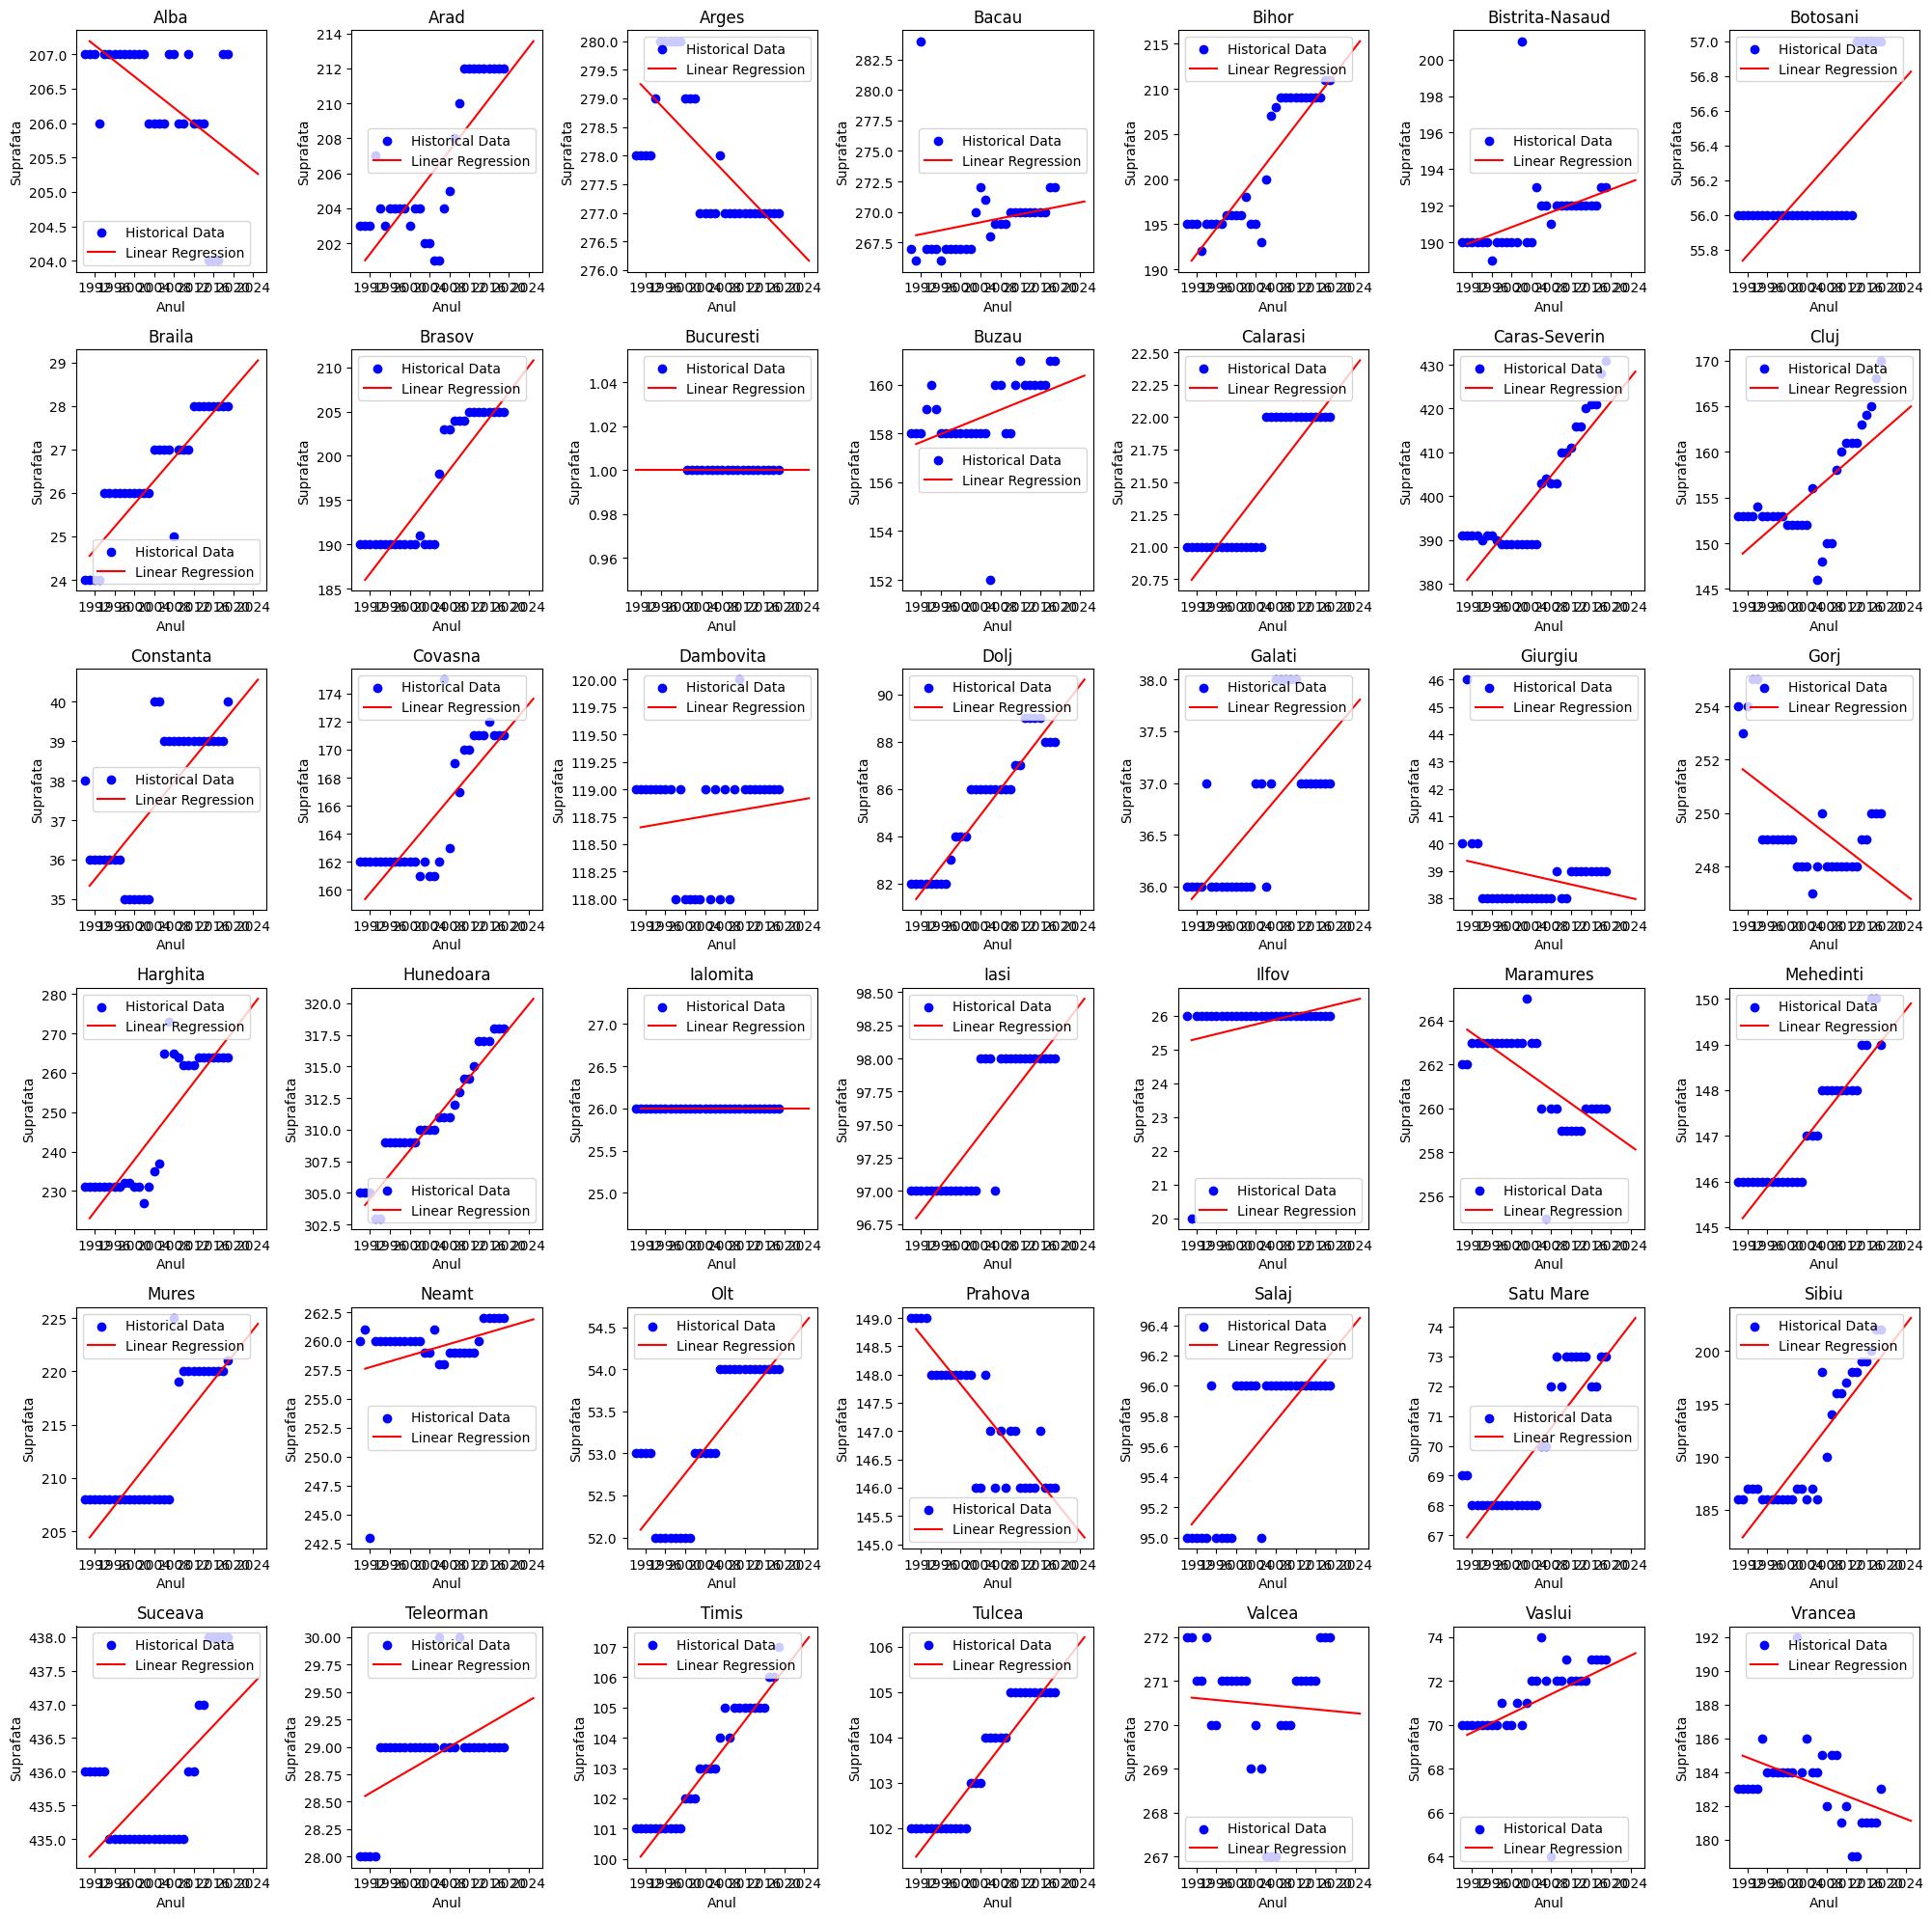

In [46]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math

# Load the dataset
Judete = pd.read_csv('Judete.csv')

# Ensure 'Year' is a datetime object
Judete['Year'] = pd.to_datetime(Judete['Year'], format='%Y')

# Filter the data for 'Total' category
filtered_data = Judete[Judete['Category'] == 'Total']

# List of unique regions in the dataset, sorted alphabetically
regions = sorted(filtered_data['Region'].unique())

# Calculate the number of rows and columns for subplots
num_plots = len(regions)
num_rows = math.ceil(num_plots / 7)  # Adjust the number of columns for your preference
num_cols = 7  # Number of columns for the grid layout

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each region and fit linear regression model
for i, region in enumerate(regions):
    region_data = filtered_data[filtered_data['Region'] == region]

    # Aggregate data by year
    region_data = region_data.groupby('Year')['Value'].sum().reset_index()

    # Extracting year values as integers
    X = region_data['Year'].dt.year.values.reshape(-1, 1)

    # Extracting forest surface values
    y = region_data['Value']

    # Initialize and fit Linear Regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict forest surface for years from 1990 to 2030
    years = pd.Series(pd.date_range(start='1990', end='2025', freq='YE'))
    X_pred = years.dt.year.values.reshape(-1, 1)
    y_pred = model.predict(X_pred)

    # Plot the results for each region
    ax = axes[i]
    ax.scatter(region_data['Year'], region_data['Value'], color='blue', label='Historical Data')
    ax.plot(years, y_pred, color='red', label='Linear Regression')
    ax.set_xlabel('Anul')
    ax.set_ylabel('Suprafata')
    ax.set_title(region)
    ax.legend()

# Hide any empty subplots
for i in range(num_plots, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()
